In [3]:
import matplotlib.pyplot as plot
from homophonic import HomophonicCipher, POLISH_CHARACTERISTIC
from statistics import stdev, variance, mean

alphabet_sizes = [26, 52, 156, 312, 512]

# Rozkłady alfabetu

Warto zaznaczyć, że dla n=26 jest to efektywnie **najzwyczajniejszy szyfr podstawieniowy**.

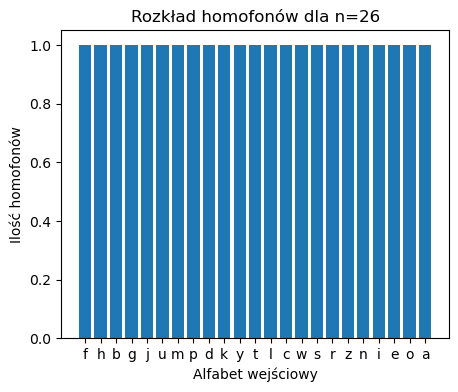

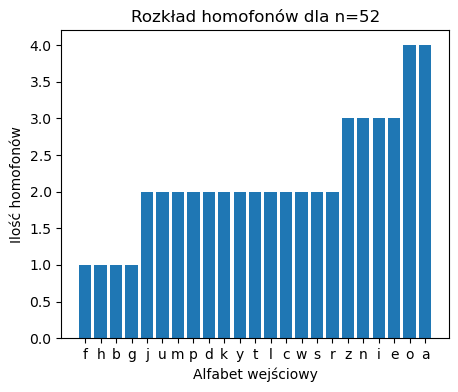

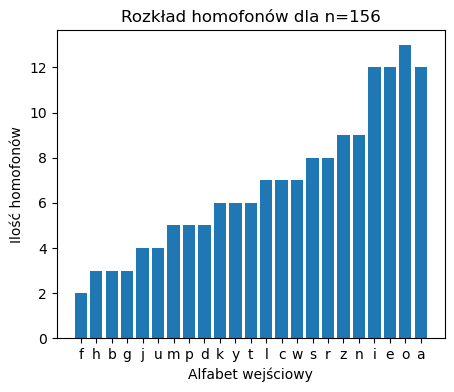

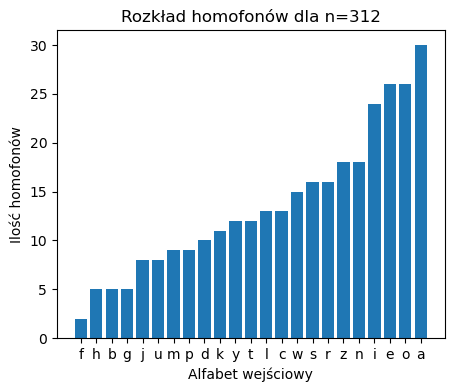

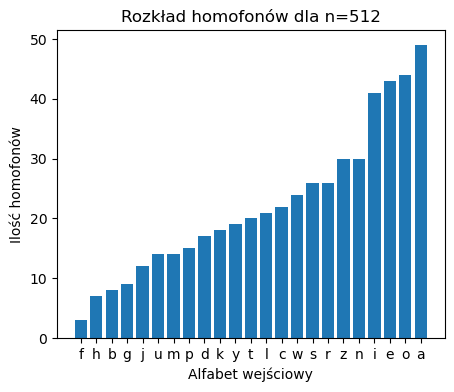

In [5]:
for size in alphabet_sizes:

    alpha = [ f'{x:03x}' for x in range(size) ]
    cipher = HomophonicCipher(POLISH_CHARACTERISTIC, alpha)

    most_homophones = len(max(cipher.homophones.items(), key=lambda x: len(x[1]))[1]) + 1

    plot.figure(figsize=(5,4))
    plot.title(f'Rozkład homofonów dla n={size}')
    plot.xlabel('Alfabet wejściowy')
    plot.ylabel('Ilość homofonów')
    
    counts = [len(cipher.homophones[l]) for l in cipher.homophones]
    plot.bar([l for l in cipher.homophones], counts)
    plot.show()

# Analiza częstotliwości szyfrogramów
Na przykład tekstu jawnego wybrano Pana Tadeusza. (źródło: https://wolnelektury.pl/)

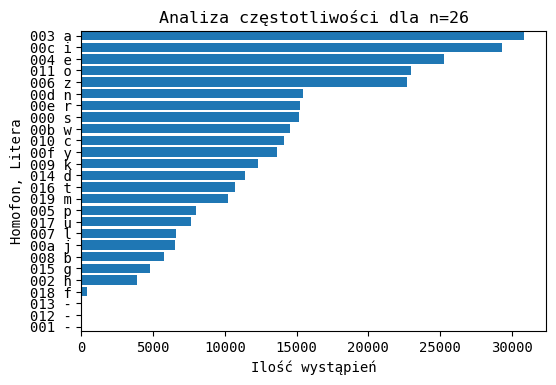

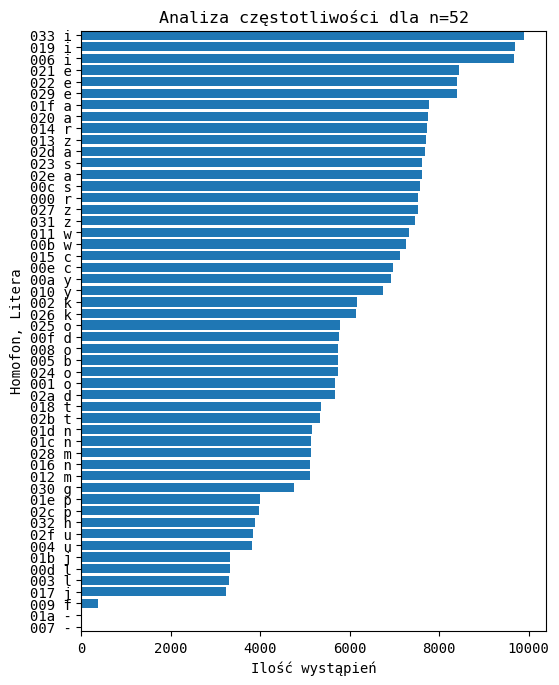

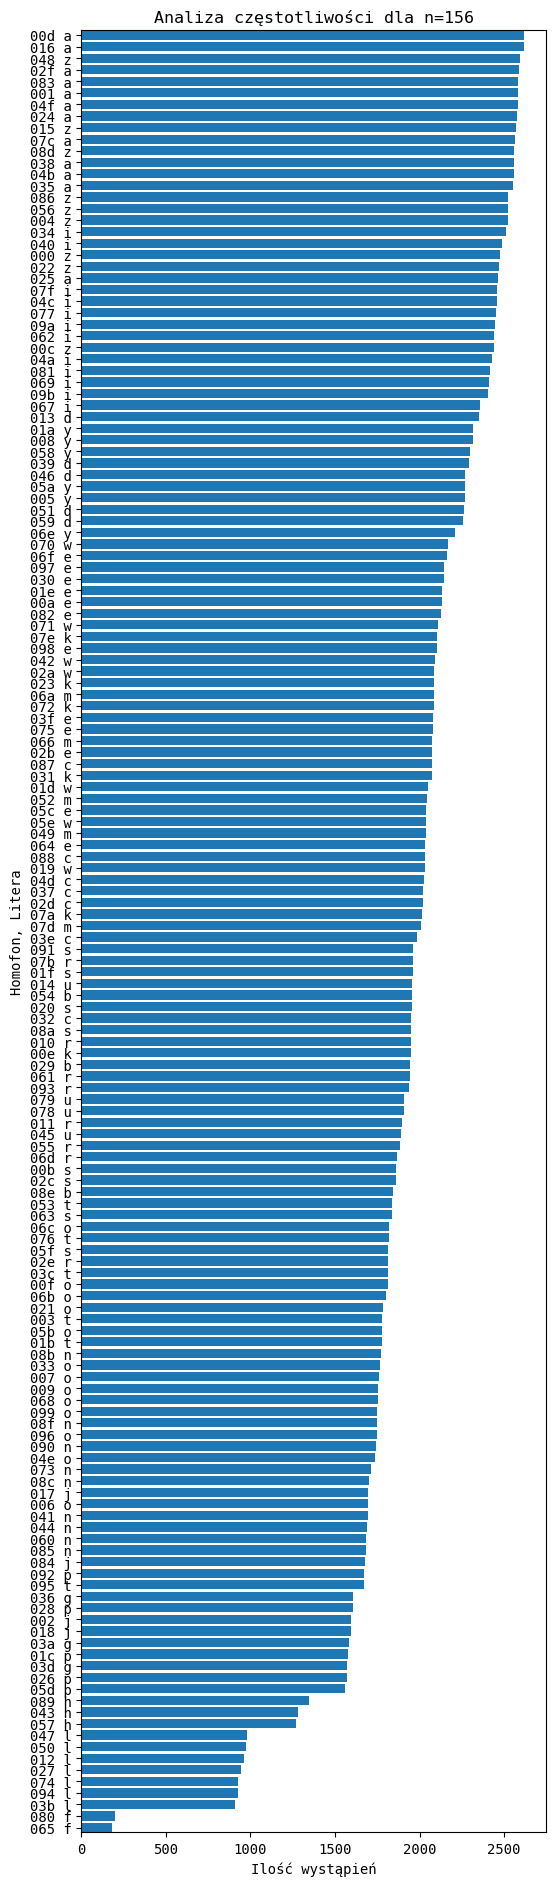

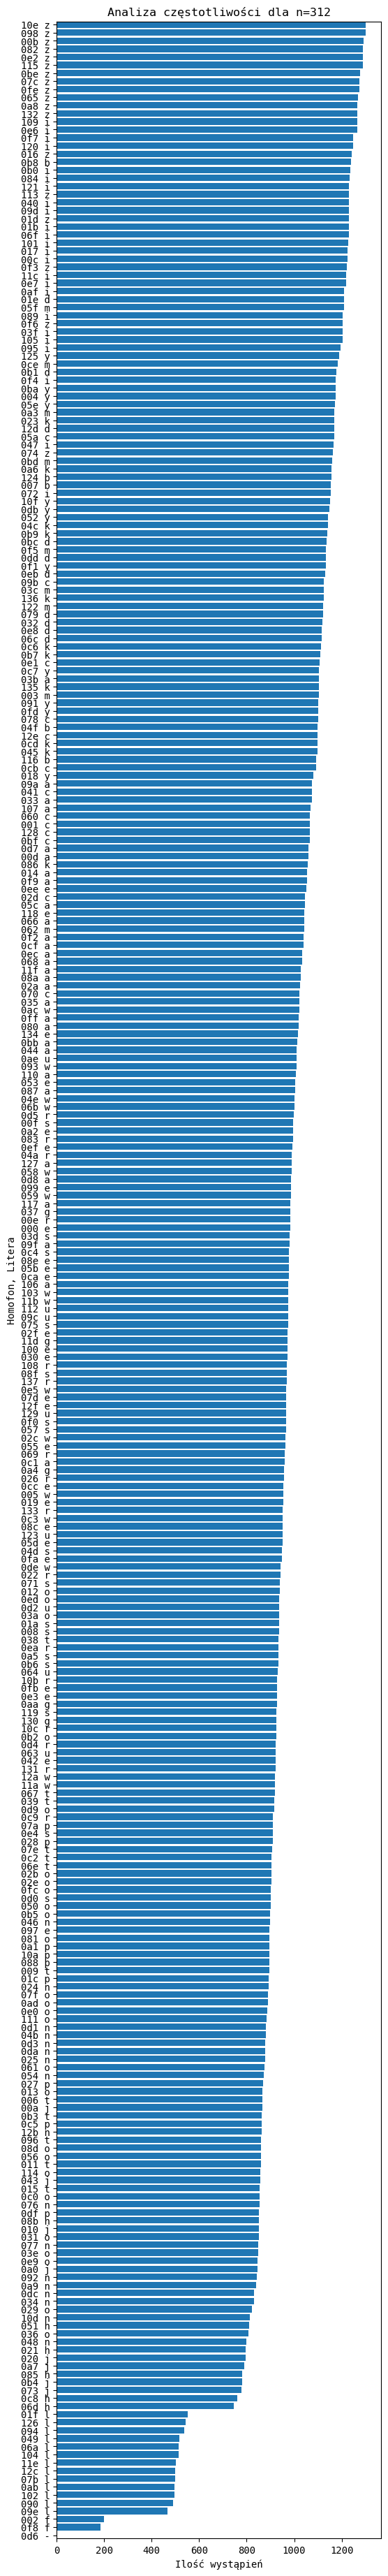

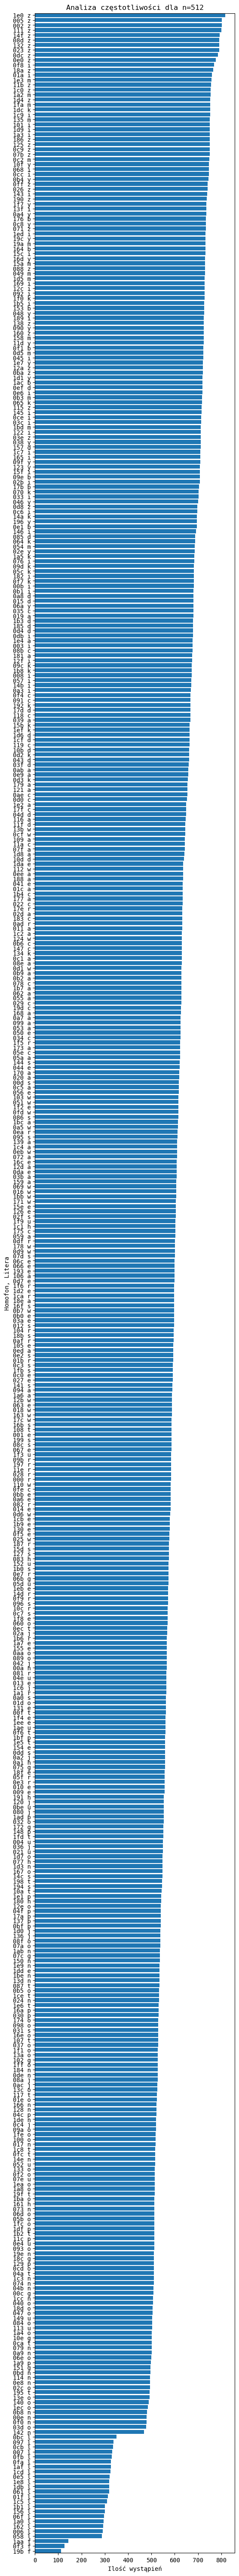

In [6]:
pan_tadeusz = open('plaintexts/pan-tadeusz.txt').read()
lalka       = open('plaintexts/lalka.txt').read()

for size in alphabet_sizes:
    alpha = [f'{x:03x}' for x in range(size)]
    cipher = HomophonicCipher(POLISH_CHARACTERISTIC, alpha, keep_whitespace=False)

    ciphertext = cipher.encrypt(pan_tadeusz)

    # Analiza częstotliwości, ale znana jest tabela podglądowa
    # Obok homofonu będzie widniał odpowiadający mu znak.
    reverse_lookup = lambda x: next( (n[0] for n in cipher.homophones.items() if x in n[1]) , '-')

    symbols = [ ciphertext[i:i + cipher.symbol_length] for i in range(0, len(ciphertext), cipher.symbol_length)]
    analysis = [ (f'{x} {reverse_lookup(x)}', symbols.count(x)) for x in alpha ]
    
    plot.rcParams.update({'font.family': 'monospace'})
    plot.figure(figsize=(6, 0.15*len(alpha)))
    plot.title(f'Analiza częstotliwości dla n={size}')
    plot.ylabel('Homofon, Litera')
    plot.xlabel('Ilość wystąpień')
    plot.barh(*zip(*sorted(analysis, key=lambda x: x[1])))
    plot.margins(y=0)
    plot.show()

# Tekst jawny z zad. 1

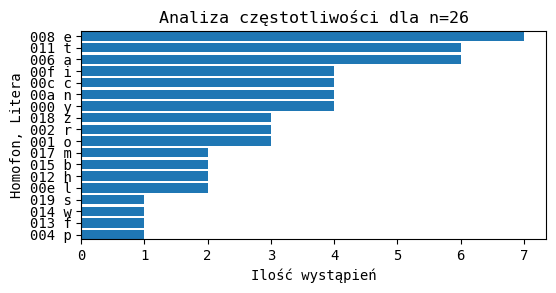

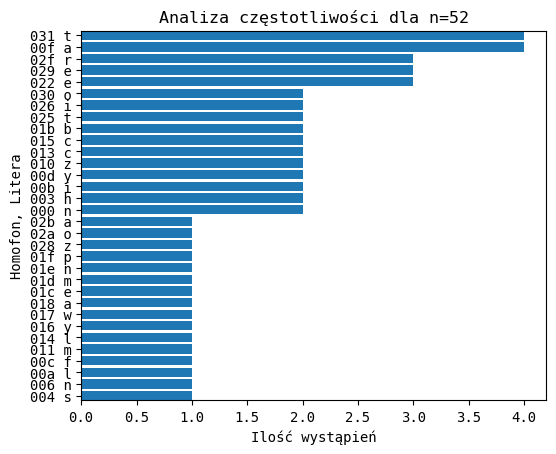

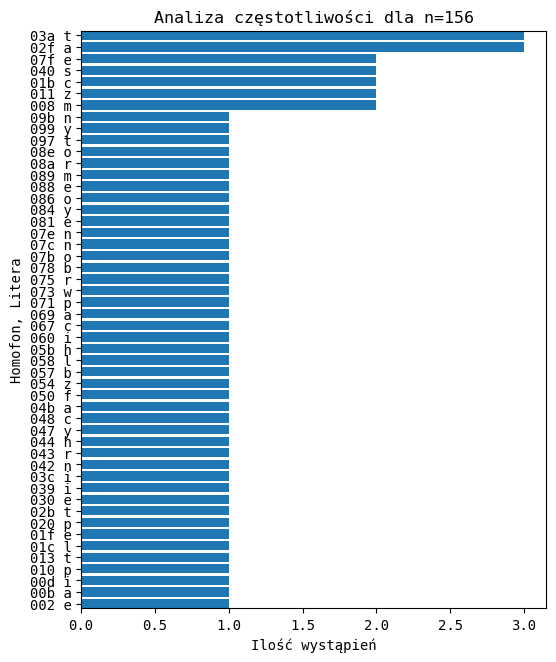

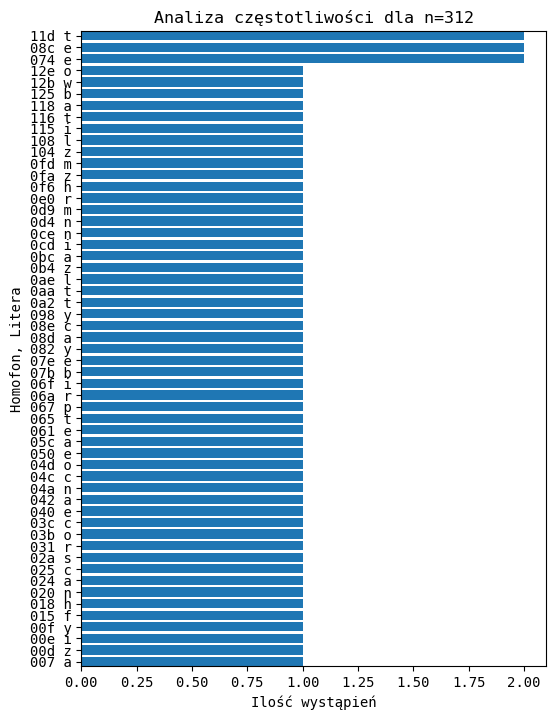

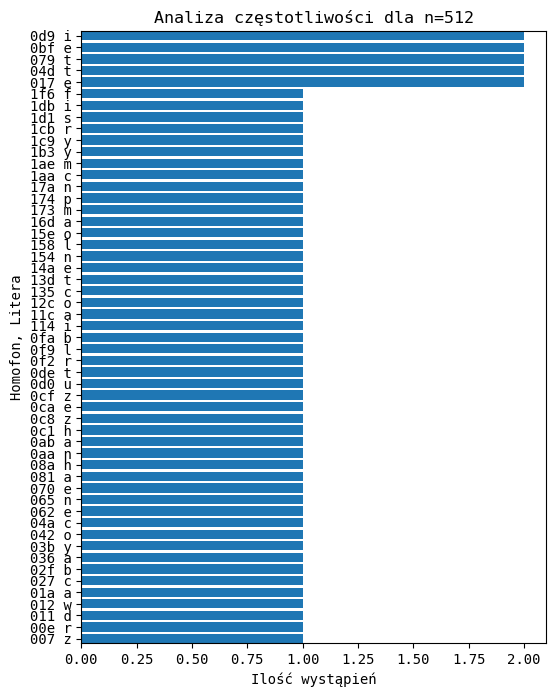

In [7]:
plaintext = 'tematy bezpieczenstwa i niebezpieczenstwa w systemach teleinformatycznych poruszamy na laboratoriach'
for size in alphabet_sizes:
    alpha = [f'{x:03x}' for x in range(size)]
    cipher = HomophonicCipher(POLISH_CHARACTERISTIC, alpha)

    ciphertext = cipher.encrypt(plaintext)
    
    reverse_lookup = lambda x: next( (n[0] for n in cipher.homophones.items() if x in n[1]) , '-')

    symbols = [ ciphertext[i:i + cipher.symbol_length] for i in range(0, len(ciphertext), cipher.symbol_length)]
    analysis = [ (f'{x} {reverse_lookup(x)}', symbols.count(x)) for x in alpha ]
    
    # Tutaj ignorujemy puste przypisania,
    # Kryptoanalityk i tak ich nie zobaczy.
    analysis = list(filter(lambda x: x[1] != 0, analysis))

    plot.rcParams.update({'font.family': 'monospace'})
    plot.figure(figsize=(6, 0.15*len(analysis)))
    plot.title(f'Analiza częstotliwości dla n={size}')
    plot.ylabel('Homofon, Litera')
    plot.xlabel('Ilość wystąpień')
    plot.barh(*zip(*sorted(analysis, key=lambda x: x[1])))
    plot.margins(y=0)
    plot.show()

# W czym problem?

Pomimo **poprawnego** zamaskowania charakterystyki tekstu z zad. 1, charakterystyka szyfrogramu Pana Tadeusza posiada już wyraźne odchylenia.

Brak zamaskowania charakterystyki niektórych liter wynika z tego, że podana charakterystyka **nie odpowiada rzeczywistości** (a konkretnie, wybranemu tekstowi jawnemu).

Jedynym sposobem na to jest bardzo dokładne dobranie charakterystyki "na wymiar" pod tekst jawny lub na odwrót - dokładne trzymanie się charakterystyki w tekście jawnym.
(Co ważne, nie wystarczy dokleić dużo `f`, bo to jeszcze łatwiej rozpoznać).

# Działanie w idealnych warunkach

Dopiero wymuszając idealne warunki dla szyfru (tj. tekst jawny **idealnie** pasujący do charakterystki), widać jego zamierzony efekt.

Długość szyfrogramu:   10009
Średnia arytmetyczna:  384.96
Entropia t. jawnego:   4.27868479258774
Entropia szyfrogramu:  2.4938772098003756
Odchyl. standardowe:   280.26
Ochdyl. min od max.:   3.44 sigma


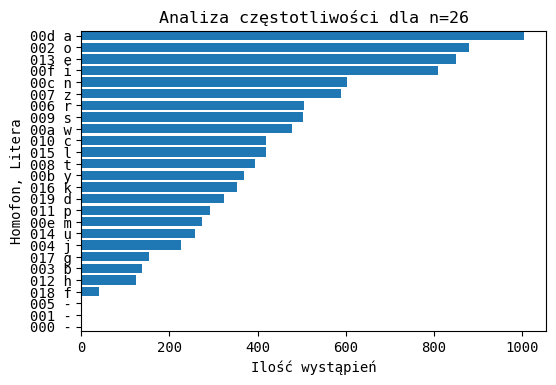

Długość szyfrogramu:   10009
Średnia arytmetyczna:  192.48
Entropia t. jawnego:   4.27868479258774
Entropia szyfrogramu:  2.7816122329239397
Odchyl. standardowe:   66.35
Ochdyl. min od max.:   4.05 sigma


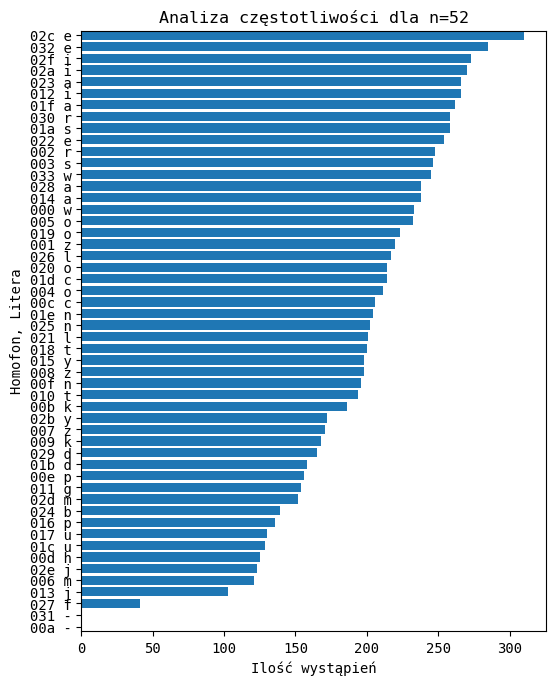

Długość szyfrogramu:   10009
Średnia arytmetyczna:  64.16
Entropia t. jawnego:   4.27868479258774
Entropia szyfrogramu:  3.272317750308732
Odchyl. standardowe:   12.10
Ochdyl. min od max.:   6.86 sigma


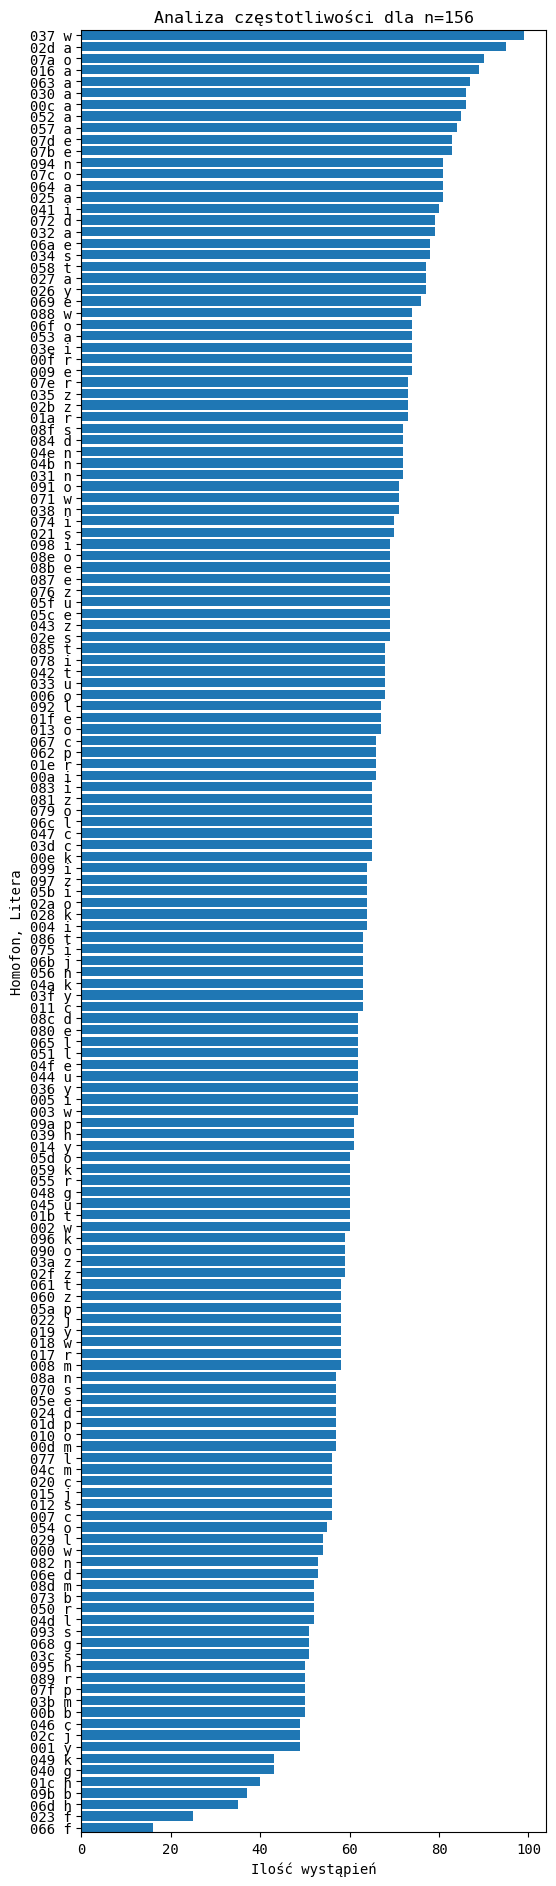

Długość szyfrogramu:   10009
Średnia arytmetyczna:  32.08
Entropia t. jawnego:   4.27868479258774
Entropia szyfrogramu:  3.468590481842253
Odchyl. standardowe:   5.64
Ochdyl. min od max.:   5.67 sigma


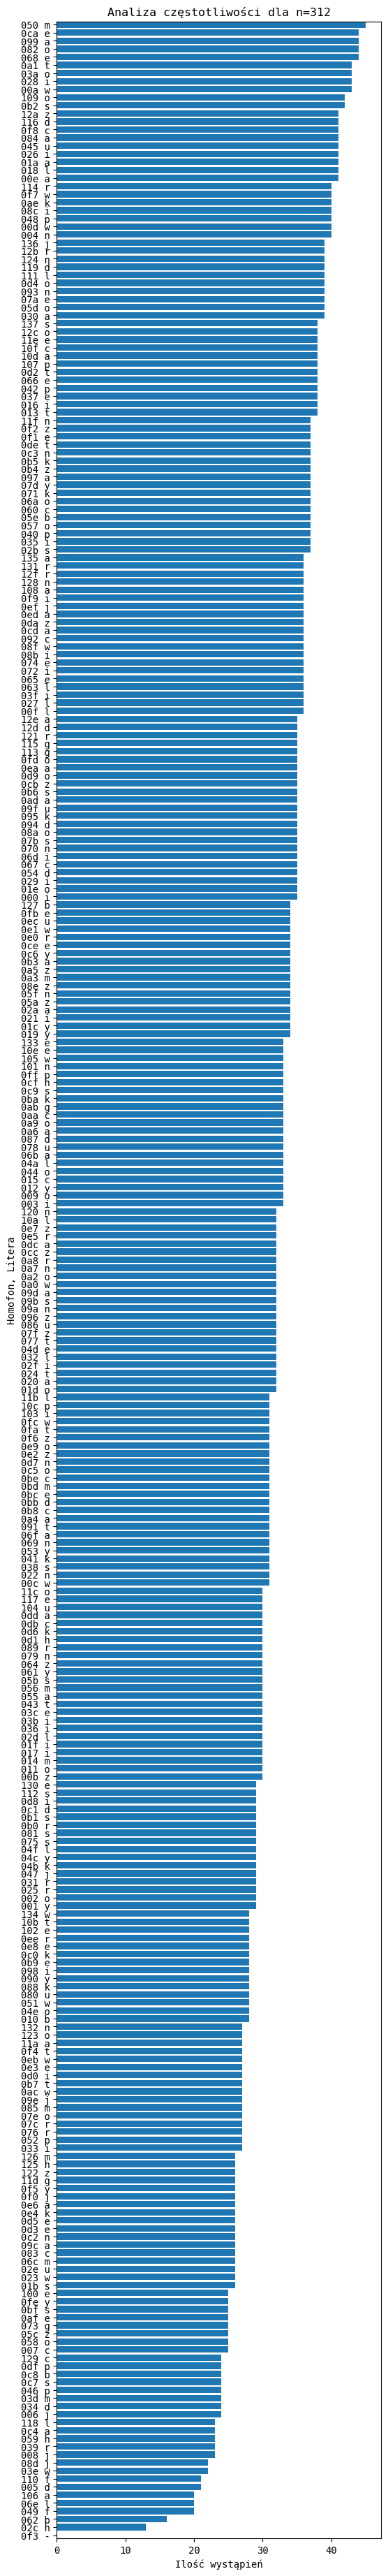

Długość szyfrogramu:   10009
Średnia arytmetyczna:  19.55
Entropia t. jawnego:   4.27868479258774
Entropia szyfrogramu:  3.617717303170485
Odchyl. standardowe:   4.30
Ochdyl. min od max.:   5.58 sigma


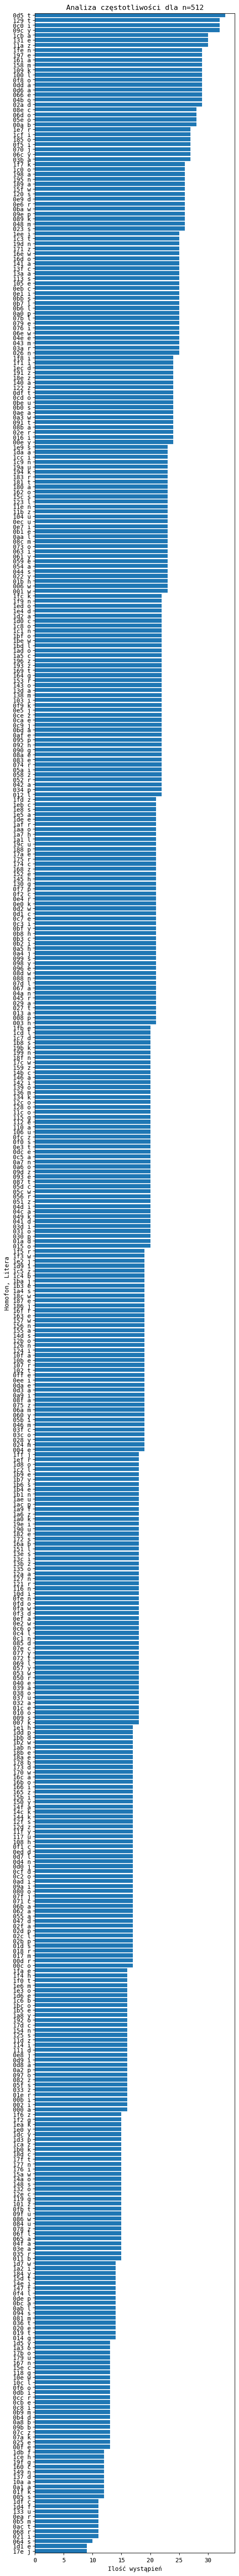

In [11]:
from math import ceil, sqrt

ideal_plaintext: str
"""Będzie on składał się z idealnie takiej proporcji liter alfabetu jaką przewiduje charakterystyka"""

plaintext_len = 10_000 # Będzie marginalne odchylenie od tej wartości
ideal_plaintext = ''.join([ x[0] * ceil(x[1] * plaintext_len) for x in POLISH_CHARACTERISTIC])

for size in alphabet_sizes:
    alpha = [f'{x:03x}' for x in range(size)]
    cipher = HomophonicCipher(POLISH_CHARACTERISTIC, alpha, keep_whitespace=False)

    ciphertext = cipher.encrypt(ideal_plaintext)

    # Analiza częstotliwości, ale znana jest tabela podglądowa
    # Obok homofonu będzie widniał odpowiadający mu znak.
    reverse_lookup = lambda x: next( (n[0] for n in cipher.homophones.items() if x in n[1]) , '-')

    symbols = [ ciphertext[i:i + cipher.symbol_length] for i in range(0, len(ciphertext), cipher.symbol_length)]
    analysis = sorted([ (f'{x} {reverse_lookup(x)}', symbols.count(x)) for x in alpha ], key=lambda x: x[1])
    
    plot.rcParams.update({'font.family': 'monospace'})
    plot.figure(figsize=(6, 0.15*len(alpha)))
    plot.title(f'Analiza częstotliwości dla n={size}')
    plot.ylabel('Homofon, Litera')
    plot.xlabel('Ilość wystąpień')
    plot.barh(*zip(*analysis))
    plot.margins(y=0)

    dev  = stdev([x[1] for x in analysis])
    var  = variance([x[1] for x in analysis])
    mea = mean([x[1] for x in analysis])

    mi = min(filter(lambda x: x[1] != 0, analysis), key=lambda x: x[1])[1]
    ma = max(analysis, key=lambda x: x[1])[1]

    print('=======')
    print(f'Długość szyfrogramu:   {len(symbols)}')
    print(f'Średnia arytmetyczna:  {mea:.2f}')
    print(f'Odchyl. standardowe:   {dev:.2f}')
    print(f'Ochdyl. min od max.:   {(ma - mi) / dev :.2f} sigma')
    plot.show()


# Wynik

Jak widać, żadna litera nie jest już możliwa do rozpoznania wyłacznie na podstawie analizy częstotliwości.